# Data Preparations

## Importing Stage

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('../data/sample_social_media_data.csv', sep=',', header=0, encoding='latin1')

## Quick Glance

In [9]:
df.head()

,id,platform,username,post_date,content,likes,comments,shares
0,1,Twitter,fosterkayla,2023-10-10 07:45:03,Scene six education society.,17,15,14
1,2,Facebook,xnorris,2023-10-25 07:45:03,Practice people than help tend likely.,177,4,29
2,3,Facebook,michelleking,2023-03-25 03:45:03,Daughter yes word risk shoulder evening nation.,279,39,24
3,4,Instagram,penaveronica,2022-12-10 17:45:03,All prove lot bit teacher election speak.,45,18,13
4,5,Instagram,smithmeghan,2022-12-10 01:45:03,Those lawyer each sit sure organization stop.,12,6,9


### Detecting Null Data(s)

In [11]:
df.isna().sum()

id           0
platform     0
username     0
post_date    0
content      0
likes        0
comments     0
shares       0
dtype: int64

## Data Cleansing (Skipped, no nulls)

### Altering Null(s)

### Applying Cleaned Data

### Verify Data Null(s)

## Output the Cleansed Data (Skipped, no nulls)

# Data Analysis

## How has the number of followers grown over the past few months?

### Converting Date and Grouping

In [28]:
# Convert 'post_date' to a datetime type
df['post_date'] = pd.to_datetime(df['post_date'])

# Extract the year and month for grouping
df['year_month'] = df['post_date'].dt.to_period('M')

# Group by platform and year-month to analyze engagement growth
engagement_growth = df.groupby(['platform', 'year_month'])[['likes', 'comments', 'shares']].sum().reset_index()

# Print the result
print(engagement_growth)

     platform year_month  likes  comments  shares
0    Facebook    2022-12  13798      2337    1464
1    Facebook    2023-01  13311      2156    1321
2    Facebook    2023-02   9194      1671     989
3    Facebook    2023-03  12810      2047    1399
4    Facebook    2023-04  12728      2289    1366
5    Facebook    2023-05  12204      2111    1067
6    Facebook    2023-06  13439      2623    1380
7    Facebook    2023-07  12460      1741    1100
8    Facebook    2023-08  16457      2618    1536
9    Facebook    2023-09  14877      2315    1274
10   Facebook    2023-10  12556      2092    1183
11   Facebook    2023-11   9748      1714    1059
12   Facebook    2023-12    664        64      69
13  Instagram    2022-12  11951      2116    1192
14  Instagram    2023-01  11020      2196    1414
15  Instagram    2023-02  12607      2018    1138
16  Instagram    2023-03  11911      2029    1289
17  Instagram    2023-04  11960      2118    1321
18  Instagram    2023-05  14852      2734    1496


### Visualization

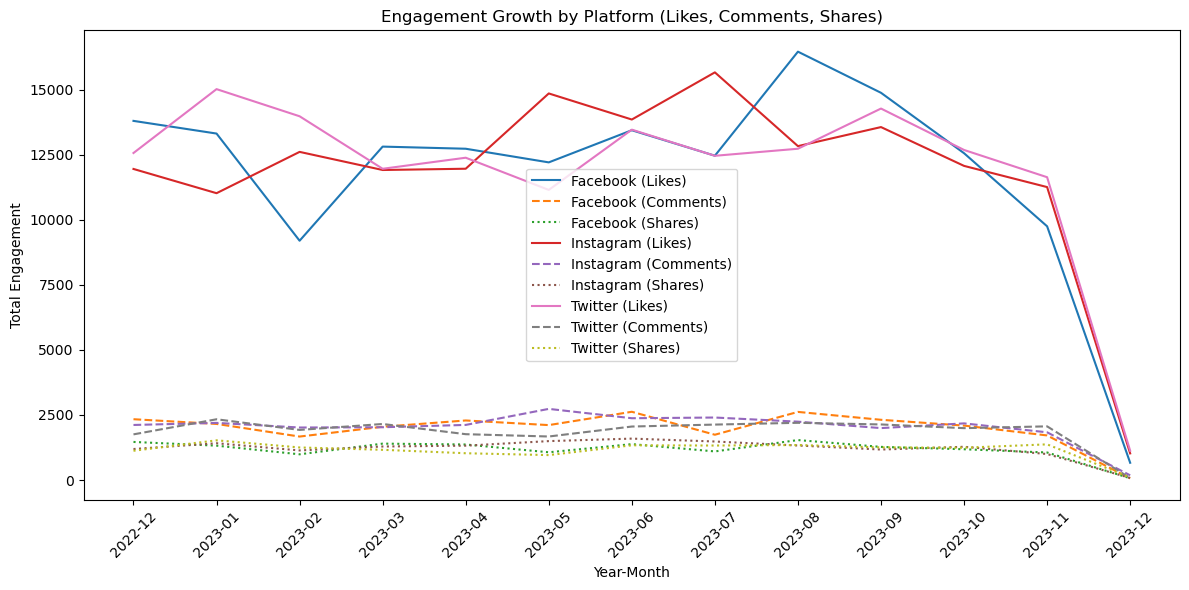

In [30]:
# Plot the engagement trend for each platform
plt.figure(figsize=(12, 6))
for platform in engagement_growth['platform'].unique():
    platform_data = engagement_growth[engagement_growth['platform'] == platform]
    plt.plot(platform_data['year_month'].astype(str), platform_data['likes'], label=f'{platform} (Likes)')
    plt.plot(platform_data['year_month'].astype(str), platform_data['comments'], linestyle='--', label=f'{platform} (Comments)')
    plt.plot(platform_data['year_month'].astype(str), platform_data['shares'], linestyle=':', label=f'{platform} (Shares)')

plt.title("Engagement Growth by Platform (Likes, Comments, Shares)")
plt.xlabel("Year-Month")
plt.ylabel("Total Engagement")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Finding pattern in posting frequency or user activity during certain hours of the day

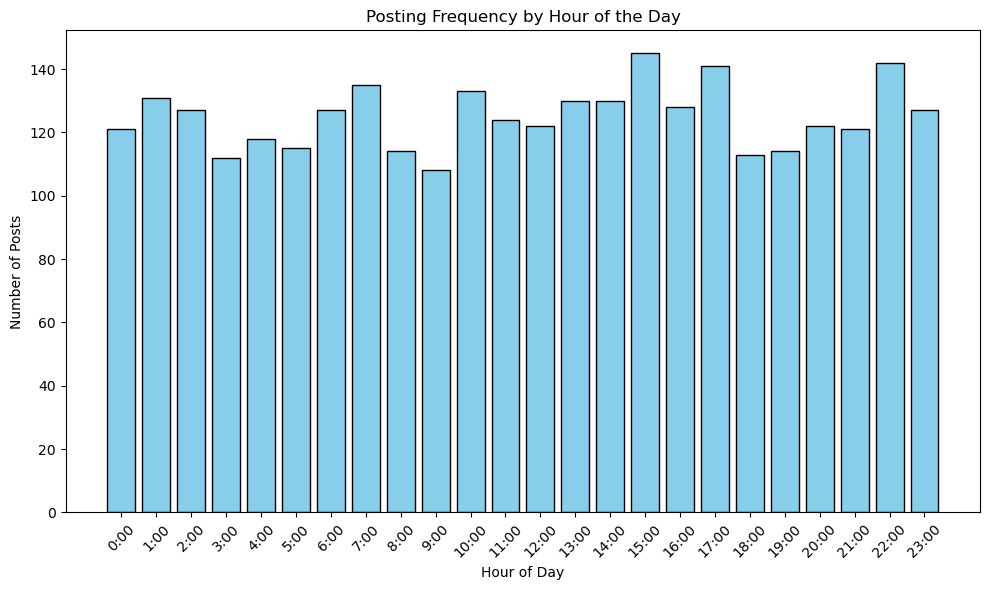

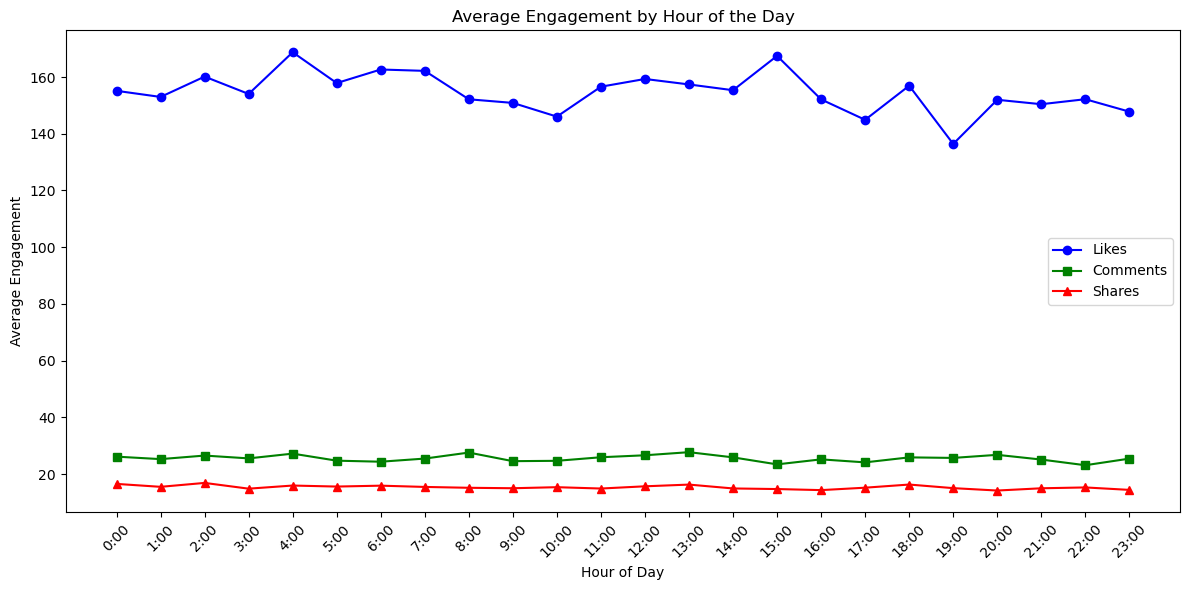

In [32]:
# Extract the hour from 'post_date'
df['hour'] = df['post_date'].dt.hour

# Group by hour to count the number of posts
posting_frequency = df.groupby('hour').size().reset_index(name='post_count')

# Plot posting frequency
plt.figure(figsize=(10, 6))
plt.bar(posting_frequency['hour'], posting_frequency['post_count'], color='skyblue', edgecolor='black')
plt.xticks(range(0, 24), [f"{h}:00" for h in range(0, 24)], rotation=45)
plt.title("Posting Frequency by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()

# Additional analysis: Average engagement (likes, comments, shares) by hour
engagement_by_hour = df.groupby('hour')[['likes', 'comments', 'shares']].mean().reset_index()

# Plot average engagement by hour
plt.figure(figsize=(12, 6))
plt.plot(engagement_by_hour['hour'], engagement_by_hour['likes'], label='Likes', marker='o', color='blue')
plt.plot(engagement_by_hour['hour'], engagement_by_hour['comments'], label='Comments', marker='s', color='green')
plt.plot(engagement_by_hour['hour'], engagement_by_hour['shares'], label='Shares', marker='^', color='red')

plt.xticks(range(0, 24), [f"{h}:00" for h in range(0, 24)], rotation=45)
plt.title("Average Engagement by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Engagement")
plt.legend()
plt.tight_layout()
plt.show()

## Calculating the average number of likes, comments, and shares of the entire Dataset

In [34]:
# Calculate the averages
average_likes = df['likes'].mean()
average_comments = df['comments'].mean()
average_shares = df['shares'].mean()

# Display the results
print(f"Average Likes per Post: {average_likes:.2f}")
print(f"Average Comments per Post: {average_comments:.2f}")
print(f"Average Shares per Post: {average_shares:.2f}")

Average Likes per Post: 154.73
Average Comments per Post: 25.49
Average Shares per Post: 15.34


## Is there a correlation between the length of the post text and the number of interactions?

In [36]:
# Calculate the length of each post's content
df['content_length'] = df['content'].str.len()

# Calculate the correlation between content length and interactions
correlation_likes = df['content_length'].corr(df['likes'])
correlation_comments = df['content_length'].corr(df['comments'])
correlation_shares = df['content_length'].corr(df['shares'])

# Display the results
print(f"Correlation between content length and likes: {correlation_likes:.2f}")
print(f"Correlation between content length and comments: {correlation_comments:.2f}")
print(f"Correlation between content length and shares: {correlation_shares:.2f}")

Correlation between content length and likes: 0.02
Correlation between content length and comments: -0.01
Correlation between content length and shares: -0.04


In [37]:
# Content length and likes has a very small positive correlation
# Content length and comments has a very small negative correlation
# Content length and shares has a very small negative correlation
# All the correlations found are so small it's almost non-existent

## Finding users with the biggest impacts on social media

In [39]:
# Calculate the total interactions for each post
df['total_interactions'] = df['likes'] + df['comments'] + df['shares']

# Group by platform and username to calculate total and average interactions
impact = df.groupby(['platform', 'username'])[['likes', 'comments', 'shares', 'total_interactions']].sum().reset_index()

# Sort by total interactions in descending order
impact = impact.sort_values(by='total_interactions', ascending=False)

# Display the top users with the highest impact
print("Top users with the biggest impact:")
print(impact.head(10))  # Display top 10 users

Top users with the biggest impact:
       platform        username  likes  comments  shares  total_interactions
1430  Instagram   jenniferbrown    546        74      28                 648
733    Facebook          qwhite    482        75       6                 563
2420    Twitter  johnsonmichael    466        35      59                 560
2109    Twitter     brewersarah    394        58      29                 481
482    Facebook        kingjose    349        62      37                 448
2413    Twitter          john28    381        38      23                 442
835    Facebook    smithkenneth    354        46      34                 434
2943    Twitter  williamsdaniel    294        96      41                 431
2966    Twitter          ydavis    341        55      33                 429
372    Facebook     jeffreyking    367        41      17                 425


In [40]:
#jenniferbrown on Instagram seems to be the user with the most impacts
#For Facebook platform it'd be user qwhite
#For Twitter platform it'd be user johnsonmichael